In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

In [2]:
base_total_sum = pd.read_csv('datasets/base_total_sum.csv', encoding='gbk')

In [3]:
base_total_sum

,ID,注册时间,注册资本,行业,区域,企业类型,控制人类型,控制人持股比例,flag
0,28,2007.0,2050.0,交通运输业,福建,农民专业合作社,企业法人,NaN,1.0
1,230,2008.0,3360.0,服务业,广东,农民专业合作社,企业法人,1.00,1.0
2,429,2005.0,9670.0,工业,江西,集体所有制企业,自然人,0.75,1.0
3,693,2011.0,8360.0,社区服务,山东,股份有限公司,企业法人,0.98,1.0
4,727,2001.0,8720.0,零售业,江西,股份有限公司,企业法人,0.54,1.0
...,...,...,...,...,...,...,...,...,...
45929,5999996,2011.0,2170.0,零售业,湖北,农民专业合作社,自然人,0.93,0.0
45930,5999997,2013.0,9030.0,交通运输业,福建,集体所有制企业,企业法人,0.73,0.0
45931,5999998,2014.0,4510.0,服务业,湖南,股份有限公司,自然人,0.64,0.0
45932,5999999,2014.0,9130.0,交通运输业,福建,股份有限公司,自然人,0.80,0.0


In [4]:
knowledge_total_sum = pd.read_csv('datasets/knowledge_total_sum.csv', encoding='gbk')

In [5]:
knowledge_total_sum

,ID,专利,商标,著作权
0,28,0.0,1.0,1.0
1,230,0.0,0.0,0.0
2,429,1.0,0.0,0.0
3,693,0.0,0.0,0.0
4,727,0.0,0.0,0.0
...,...,...,...,...
45929,5999996,1.0,1.0,0.0
45930,5999997,1.0,1.0,0.0
45931,5999998,0.0,0.0,0.0
45932,5999999,1.0,1.0,1.0


In [6]:
money_report_total_sum = pd.read_csv('datasets/money_report_total_sum.csv', encoding='gbk')

In [7]:
money_report_total_sum

,ID,year,债权融资额度,债权融资成本,股权融资额度,股权融资成本,内部融资和贸易融资额度,内部融资和贸易融资成本,项目融资和政策融资额度,项目融资和政策融资成本
0,28,2015.0,0.0,0.00,0.00,0.0000,21648.0,1298.880,0.0,0.000
1,230,2015.0,0.0,0.00,0.00,0.0000,0.0,0.000,470.4,28.224
2,429,2015.0,19340.0,1547.20,0.00,0.0000,0.0,0.000,0.0,0.000
3,693,2015.0,0.0,0.00,0.00,0.0000,0.0,0.000,5350.4,321.024
4,727,2015.0,0.0,0.00,32229.12,1289.1648,0.0,0.000,0.0,0.000
...,...,...,...,...,...,...,...,...,...,...
137797,5999996,2017.0,0.0,0.00,3958.08,158.3232,0.0,0.000,0.0,0.000
137798,5999997,2017.0,14448.0,1155.84,0.00,0.0000,0.0,0.000,0.0,0.000
137799,5999998,2017.0,0.0,0.00,0.00,0.0000,18265.5,1095.930,0.0,0.000
137800,5999999,2017.0,0.0,0.00,0.00,0.0000,0.0,0.000,821.7,49.302


In [8]:
year_report_total_sum = pd.read_csv('datasets/year_report_total_sum.csv', encoding='gbk')

In [9]:
year_report_total_sum

,ID,year,从业人数,资产总额,负债总额,营业总收入,主营业务收入,利润总额,净利润,纳税总额,所有者权益合计
0,28,2015.0,794.0,16400.0,28700.0,72160.0,28864.0,7216.0,-7216.0,0.0,-12300.0
1,230,2015.0,485.0,23520.0,10080.0,115248.0,57624.0,57624.0,-11524.8,0.0,13440.0
2,429,2015.0,136.0,193400.0,183730.0,502840.0,351988.0,NaN,-50284.0,0.0,9670.0
3,693,2015.0,534.0,133760.0,125400.0,655424.0,262169.6,196627.2,-65542.4,0.0,8360.0
4,727,2015.0,375.0,366240.0,536280.0,402864.0,282004.8,161145.6,-40286.4,0.0,-170040.0
...,...,...,...,...,...,...,...,...,...,...,...
137797,5999996,2017.0,803.0,13020.0,5425.0,49476.0,19790.4,19790.4,19790.4,19790.4,7595.0
137798,5999997,2017.0,76.0,144480.0,203175.0,390096.0,234057.6,39009.6,0.0,156038.4,-58695.0
137799,5999998,2017.0,841.0,67650.0,63140.0,60885.0,30442.5,30442.5,-6088.5,0.0,4510.0
137800,5999999,2017.0,46.0,82170.0,73040.0,16434.0,11503.8,8217.0,6573.6,9860.4,9130.0


In [10]:
condition = ~year_report_total_sum['资产总额'].isnull() & ~year_report_total_sum['负债总额'].isnull() \
& ~year_report_total_sum['所有者权益合计'].isnull() & ~(year_report_total_sum['资产总额'] == year_report_total_sum['负债总额']\
                                                + year_report_total_sum['所有者权益合计'])
year_report_total_sum[condition]

,ID,year,从业人数,资产总额,负债总额,营业总收入,主营业务收入,利润总额,净利润,纳税总额,所有者权益合计


In [11]:
condition = year_report_total_sum['资产总额'].isnull() & ~year_report_total_sum['负债总额'].isnull() \
& ~year_report_total_sum['所有者权益合计'].isnull()
year_report_total_sum.loc[condition, '资产总额'] = year_report_total_sum.loc[condition, '负债总额'] \
+ year_report_total_sum.loc[condition, '所有者权益合计']
condition = year_report_total_sum['资产总额'].isnull() & ~year_report_total_sum['负债总额'].isnull() \
& ~year_report_total_sum['所有者权益合计'].isnull()
year_report_total_sum[condition]

,ID,year,从业人数,资产总额,负债总额,营业总收入,主营业务收入,利润总额,净利润,纳税总额,所有者权益合计


In [12]:
condition = ~year_report_total_sum['资产总额'].isnull() & year_report_total_sum['负债总额'].isnull() \
& ~year_report_total_sum['所有者权益合计'].isnull()
year_report_total_sum.loc[condition, '负债总额'] = year_report_total_sum.loc[condition, '资产总额'] \
- year_report_total_sum.loc[condition, '所有者权益合计']
condition = ~year_report_total_sum['资产总额'].isnull() & year_report_total_sum['负债总额'].isnull() \
& ~year_report_total_sum['所有者权益合计'].isnull()
year_report_total_sum[condition]

,ID,year,从业人数,资产总额,负债总额,营业总收入,主营业务收入,利润总额,净利润,纳税总额,所有者权益合计


In [13]:
condition = ~year_report_total_sum['资产总额'].isnull() & ~year_report_total_sum['负债总额'].isnull() \
& year_report_total_sum['所有者权益合计'].isnull()
year_report_total_sum.loc[condition, '所有者权益合计'] = year_report_total_sum.loc[condition, '资产总额'] \
- year_report_total_sum.loc[condition, '负债总额']
condition = ~year_report_total_sum['资产总额'].isnull() & ~year_report_total_sum['负债总额'].isnull() \
& year_report_total_sum['所有者权益合计'].isnull()
year_report_total_sum[condition]

,ID,year,从业人数,资产总额,负债总额,营业总收入,主营业务收入,利润总额,净利润,纳税总额,所有者权益合计


In [ ]:
for i in ['注册时间', '注册资本', '控制人持股比例']:
    plt.figure()
    plt.ylabel(i)
    plt.scatter(base_total_sum[i].index, base_total_sum[i], s=1)
    plt.savefig('valueplot/' + i + '.png')

In [ ]:
for i in ['债权融资额度', '债权融资成本', '股权融资额度', '股权融资成本', '内部融资和贸易融资额度',
       '内部融资和贸易融资成本', '项目融资和政策融资额度', '项目融资和政策融资成本']:
    plt.figure()
    plt.ylabel(i)
    plt.scatter(money_report_total_sum[i].index, money_report_total_sum[i], s=1)
    plt.savefig('valueplot/' + i + '.png')

In [ ]:
for i in ['从业人数', '资产总额', '负债总额', '营业总收入', '主营业务收入', '利润总额', '净利润',
       '纳税总额', '所有者权益合计']:
    plt.figure()
    plt.ylabel(i)
    plt.scatter(year_report_total_sum[i].index, year_report_total_sum[i], s=1)
    plt.savefig('valueplot/' + i + '.png')

In [24]:
base_total_sum.isnull().sum(axis=0)

ID         0
注册时间       0
注册资本       0
行业         0
区域         0
企业类型       0
控制人类型      0
控制人持股比例    0
flag       0
dtype: int64

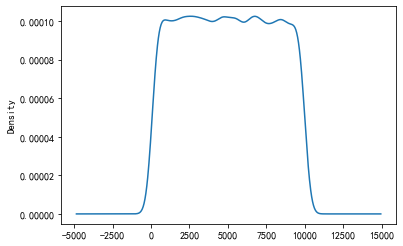

In [16]:
base_total_sum['注册资本'].plot(kind='kde')

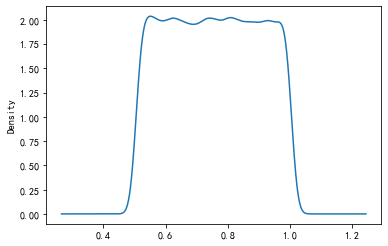

In [17]:
base_total_sum['控制人持股比例'].plot(kind='kde')

In [19]:
base_total_sum = base_total_sum.fillna({
    '注册时间': base_total_sum['注册时间'].mode().iloc[0], 
    '注册资本': base_total_sum['注册资本'].mean(),
    '行业': base_total_sum['行业'].mode().iloc[0], 
    '区域': base_total_sum['区域'].mode().iloc[0], 
    '企业类型': base_total_sum['企业类型'].mode().iloc[0], 
    '控制人类型': base_total_sum['控制人类型'].mode().iloc[0],
    '控制人持股比例': base_total_sum['控制人持股比例'].mean(),
    'flag': -1
})

In [27]:
knowledge_total_sum.isnull().sum(axis=0)

ID     0
专利     0
商标     0
著作权    0
dtype: int64

In [20]:
knowledge_total_sum = knowledge_total_sum.fillna({
    '专利': 0,
    '商标': 0,
    '著作权': 0
})

In [38]:
money_report_total_sum.isnull().sum(axis=0)

ID             0
year           0
债权融资额度         0
债权融资成本         0
股权融资额度         0
股权融资成本         0
内部融资和贸易融资额度    0
内部融资和贸易融资成本    0
项目融资和政策融资额度    0
项目融资和政策融资成本    0
dtype: int64

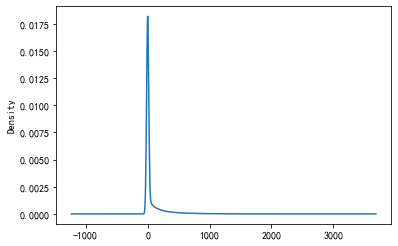

In [36]:
money_report_total_sum['项目融资和政策融资成本'].plot(kind='kde')

In [21]:
money_report_total_sum = money_report_total_sum.fillna({
    'year': money_report_total_sum['year'].mode().iloc[0],
    '债权融资额度': money_report_total_sum['债权融资额度'].mean(),
    '债权融资成本': money_report_total_sum['债权融资成本'].mean(),
    '股权融资额度': money_report_total_sum['股权融资额度'].mean(),
    '股权融资成本': money_report_total_sum['股权融资成本'].mean(),
    '内部融资和贸易融资额度': money_report_total_sum['内部融资和贸易融资额度'].mean(),
    '内部融资和贸易融资成本': money_report_total_sum['内部融资和贸易融资成本'].mean(),
    '项目融资和政策融资额度': money_report_total_sum['项目融资和政策融资额度'].mean(),
    '项目融资和政策融资成本': money_report_total_sum['项目融资和政策融资成本'].mean()
})

In [50]:
year_report_total_sum.isnull().sum(axis=0)

ID         0
year       0
从业人数       0
资产总额       0
负债总额       0
营业总收入      0
主营业务收入     0
利润总额       0
净利润        0
纳税总额       0
所有者权益合计    0
dtype: int64

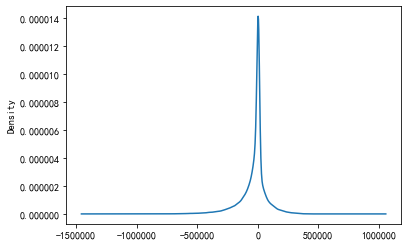

In [48]:
year_report_total_sum['所有者权益合计'].plot(kind='kde')

In [22]:
year_report_total_sum = year_report_total_sum.fillna({
    'year': year_report_total_sum['year'].mode().iloc[0],
    '从业人数': int(year_report_total_sum['从业人数'].mean()),
    '资产总额': year_report_total_sum['资产总额'].mean(),
    '负债总额': year_report_total_sum['负债总额'].mean(),
    '营业总收入': year_report_total_sum['营业总收入'].mean(),
    '主营业务收入': year_report_total_sum['主营业务收入'].mean(),
    '利润总额': year_report_total_sum['利润总额'].mean(),
    '净利润': year_report_total_sum['净利润'].mean(),
    '纳税总额': year_report_total_sum['纳税总额'].mean(),
    '所有者权益合计': year_report_total_sum['所有者权益合计'].mean()
})

In [ ]:
for i in ['注册时间', '注册资本', '行业', '区域', '企业类型', '控制人类型', '控制人持股比例']:
    plt.figure()
    base_total_sum.loc[base_total_sum['flag'] == 0, i].hist()
    plt.savefig('compareplot/' + i + '0.png')
    plt.figure()
    base_total_sum.loc[base_total_sum['flag'] == 1, i].hist()
    plt.savefig('compareplot/' + i + '1.png')

In [ ]:
for i in ['专利', '商标', '著作权']:
    plt.figure()
    knowledge_total_sum.loc[base_total_sum['flag'] == 0, i].hist()
    plt.savefig('compareplot/' + i + '0.png')
    plt.figure()
    knowledge_total_sum.loc[base_total_sum['flag'] == 1, i].hist()
    plt.savefig('compareplot/' + i + '1.png')

In [ ]:
for i in ['债权融资额度', '债权融资成本', '股权融资额度', '股权融资成本', '内部融资和贸易融资额度',
       '内部融资和贸易融资成本', '项目融资和政策融资额度', '项目融资和政策融资成本']:
    plt.figure()
    money_report_total_sum.loc[money_report_total_sum['ID'].isin(base_total_sum.loc[base_total_sum['flag'] == 0, 'ID']), i].hist()
    plt.savefig('compareplot/' + i + '0.png')
    plt.figure()
    money_report_total_sum.loc[money_report_total_sum['ID'].isin(base_total_sum.loc[base_total_sum['flag'] == 1, 'ID']), i].hist()
    plt.savefig('compareplot/' + i + '1.png')

In [ ]:
for i in ['从业人数', '资产总额', '负债总额', '营业总收入', '主营业务收入', '利润总额', '净利润',
       '纳税总额', '所有者权益合计']:
    plt.figure()
    year_report_total_sum.loc[year_report_total_sum['ID'].isin(base_total_sum.loc[base_total_sum['flag'] == 0, 'ID']), i].hist()
    plt.savefig('compareplot/' + i + '0.png')
    plt.figure()
    year_report_total_sum.loc[year_report_total_sum['ID'].isin(base_total_sum.loc[base_total_sum['flag'] == 1, 'ID']), i].hist()
    plt.savefig('compareplot/' + i + '1.png')

In [18]:
year_report_total_sum['纳税/净利'] = year_report_total_sum['纳税总额'] / (year_report_total_sum['净利润'] + 1)

In [19]:
year_report_total_sum['负债/资产'] = year_report_total_sum['负债总额'] / (year_report_total_sum['资产总额'] + 1)
year_report_total_sum['主收/营收'] = year_report_total_sum['主营业务收入'] / (year_report_total_sum['营业总收入'] + 1)
year_report_total_sum['净利/资产'] = year_report_total_sum['净利润'] / (year_report_total_sum['资产总额'] + 1)
year_report_total_sum['净利/营收'] = year_report_total_sum['净利润'] / (year_report_total_sum['营业总收入'] + 1)
year_report_total_sum['纳税/营收'] = year_report_total_sum['纳税总额'] / (year_report_total_sum['营业总收入'] + 1)

In [20]:
money_report_total_sum['额度/成本'] = (money_report_total_sum['债权融资额度'] + money_report_total_sum['股权融资额度'] + 
                                  money_report_total_sum['内部融资和贸易融资额度'] + money_report_total_sum['项目融资和政策融资额度']) /\
(money_report_total_sum['债权融资成本'] + money_report_total_sum['股权融资成本'] + 
                                  money_report_total_sum['内部融资和贸易融资成本'] + money_report_total_sum['项目融资和政策融资成本'] + 1)

In [21]:
money_report_total_sum['债+股额度/内+项额度'] = (money_report_total_sum['债权融资额度'] + money_report_total_sum['股权融资额度']) /\
                                  (money_report_total_sum['内部融资和贸易融资额度'] + money_report_total_sum['项目融资和政策融资额度'] + 1)
money_report_total_sum['债+股成本/内+项成本'] = (money_report_total_sum['债权融资成本'] + money_report_total_sum['股权融资成本']) /\
                                  (money_report_total_sum['内部融资和贸易融资成本'] + money_report_total_sum['项目融资和政策融资成本'] + 1)

In [22]:
money_report_total_sum['融资额度'] = money_report_total_sum['债权融资额度'] + money_report_total_sum['股权融资额度'] +\
                                  money_report_total_sum['内部融资和贸易融资额度'] + money_report_total_sum['项目融资和政策融资额度']
money_report_total_sum['融资成本'] = money_report_total_sum['债权融资成本'] + money_report_total_sum['股权融资成本'] +\
                                  money_report_total_sum['内部融资和贸易融资成本'] + money_report_total_sum['项目融资和政策融资成本']

In [23]:
year_report_total_sum['利润/营收'] = year_report_total_sum['利润总额'] / (year_report_total_sum['营业总收入'] + 1)
year_report_total_sum['净利/利润'] = year_report_total_sum['净利润'] / (year_report_total_sum['利润总额'] + 1)
year_report_total_sum['所得税'] = year_report_total_sum['利润总额'] - year_report_total_sum['净利润']
year_report_total_sum['所得税/纳税'] = year_report_total_sum['所得税'] / (year_report_total_sum['纳税总额'] + 1)
year_report_total_sum['净利/负债'] = year_report_total_sum['净利润'] / (year_report_total_sum['负债总额'] + 1)
year_report_total_sum['纳税/负债'] = year_report_total_sum['纳税总额'] / (year_report_total_sum['负债总额'] + 1)
year_report_total_sum['负债/所有者'] = year_report_total_sum['负债总额'] / (year_report_total_sum['所有者权益合计'] + 1)
year_report_total_sum['费用'] = year_report_total_sum['营业总收入'] - year_report_total_sum['利润总额']
year_report_total_sum['费用/营收'] = year_report_total_sum['费用'] / (year_report_total_sum['营业总收入'] + 1)
year_report_total_sum['利润/费用'] = year_report_total_sum['利润总额'] / (year_report_total_sum['费用'] + 1)
year_report_total_sum['净利/融资额度'] = year_report_total_sum['净利润'] / (money_report_total_sum['融资额度'] + 1)
year_report_total_sum['纳税/融资额度'] = year_report_total_sum['纳税总额'] / (money_report_total_sum['融资额度'] + 1)
year_report_total_sum['营收/资产'] = year_report_total_sum['营业总收入'] / (year_report_total_sum['资产总额'] + 1)
year_report_total_sum['所有者/资产'] = year_report_total_sum['所有者权益合计'] / (year_report_total_sum['资产总额'] + 1)
year_report_total_sum['净利/所有者'] = year_report_total_sum['净利润'] / (year_report_total_sum['所有者权益合计'] + 1)

In [24]:
money_report_total_sum['综合成本'] = (money_report_total_sum['债权融资成本']*money_report_total_sum['债权融资额度'] + 
                                 money_report_total_sum['股权融资成本']*money_report_total_sum['股权融资额度'] + 
                                 money_report_total_sum['内部融资和贸易融资成本']*money_report_total_sum['内部融资和贸易融资额度'] +
                                 money_report_total_sum['项目融资和政策融资成本']*money_report_total_sum['项目融资和政策融资额度']) /\
(money_report_total_sum['融资额度'] + 1)

In [25]:
year_report_total_sum['政策/净利'] = money_report_total_sum['项目融资和政策融资额度'] / (year_report_total_sum['净利润'] + 1)
year_report_total_sum['融资/负债'] = money_report_total_sum['融资额度'] / (year_report_total_sum['负债总额'] + 1)
year_report_total_sum['政策/负债'] = money_report_total_sum['项目融资和政策融资额度'] / (year_report_total_sum['负债总额'] + 1)

In [26]:
year_report_total_sum['接受补助'] = [0] * len(year_report_total_sum)

In [27]:
condition = ((year_report_total_sum['政策/净利'] < -0.5) | (year_report_total_sum['政策/净利'] > 1)) & (year_report_total_sum['负债/资产'] > 0.5)
year_report_total_sum.loc[condition, '接受补助'] = 1

In [29]:
def jinglijudge(x):
    if len(x) == 3:
        return int(x.iloc[0] < 0 and x.iloc[1] < 0 and x.iloc[2] < 0)
    elif len(x) == 2:
        return int(x.iloc[0] < 0 and x.iloc[1] < 0)
    elif len(x) == 1:
        return int(x.iloc[0] < 0)

In [30]:
year_report_groupby_sum1 = pd.DataFrame(year_report_total_sum['净利润'].groupby(year_report_total_sum['ID']).apply(jinglijudge).reset_index())
year_report_groupby_sum1.columns = ['ID', '净三小0']

In [31]:
year_report_groupby_sum1

,ID,净三小0
0,28,1
1,230,1
2,429,1
3,693,1
4,727,1
...,...,...
45929,5999995,0
45930,5999996,0
45931,5999997,0
45932,5999998,0


In [32]:
def jingyingfengxian(x):
    xmean = (x.iloc[0] + x.iloc[1] + x.iloc[2]) / 3
    return (abs(x.iloc[0] - xmean) + abs(x.iloc[1] - xmean) + abs(x.iloc[2] - xmean)) / 3 / (xmean + 1)

In [33]:
year_report_groupby_sum2 = pd.DataFrame(year_report_total_sum['净利润'].groupby(year_report_total_sum['ID']).apply(jingyingfengxian).reset_index())
year_report_groupby_sum2.columns = ['ID', '经营风险']

In [34]:
year_report_groupby_sum2

,ID,经营风险
0,28,-0.506729
1,230,-0.466044
2,429,-0.347945
3,693,-0.463028
4,727,-0.811401
...,...,...
45929,5999995,0.666651
45930,5999996,0.719276
45931,5999997,0.667667
45932,5999998,1.780526


In [35]:
def jingyingganggan(x):
    return ((x['净利润'].iloc[1] - x['净利润'].iloc[0]) / (x['营业总收入'].iloc[1] - x['营业总收入'].iloc[0] + 1) + 
            (x['净利润'].iloc[2] - x['净利润'].iloc[1]) / (x['营业总收入'].iloc[2] - x['营业总收入'].iloc[1] + 1)) / 2

In [36]:
year_report_groupby_sum3 = pd.DataFrame(year_report_total_sum.groupby('ID').apply(jingyingganggan).reset_index())
year_report_groupby_sum3.columns = ['ID', '经营杠杆']

In [37]:
year_report_groupby_sum3

,ID,经营杠杆
0,28,-0.100000
1,230,-0.099999
2,429,-0.100007
3,693,-0.100000
4,727,-0.099999
...,...,...
45929,5999995,-0.033444
45930,5999996,0.730076
45931,5999997,53.952312
45932,5999998,0.309461


In [38]:
def nashuijudge(x):
    if len(x) == 3:
        return int(x.iloc[0] <= 0 and x.iloc[1] <= 0 and x.iloc[2] <= 0)
    elif len(x) == 2:
        return int(x.iloc[0] <= 0 and x.iloc[1] <= 0)
    elif len(x) == 1:
        return int(x.iloc[0] <= 0)

In [39]:
year_report_groupby_sum4 = pd.DataFrame(year_report_total_sum['纳税总额'].groupby(year_report_total_sum['ID']).apply(nashuijudge).reset_index())
year_report_groupby_sum4.columns = ['ID', '纳三小0']

In [40]:
year_report_groupby_sum4

,ID,纳三小0
0,28,1
1,230,1
2,429,1
3,693,1
4,727,1
...,...,...
45929,5999995,0
45930,5999996,0
45931,5999997,0
45932,5999998,0


In [41]:
def jinglisumjudge(x):
    return int(x.iloc[0] + x.iloc[1] + x.iloc[2] < 0)

In [42]:
year_report_groupby_sum5 = pd.DataFrame(year_report_total_sum['净利润'].groupby(year_report_total_sum['ID']).apply(jinglisumjudge).reset_index())
year_report_groupby_sum5.columns = ['ID', '净和小0']

In [43]:
year_report_groupby_sum5

,ID,净和小0
0,28,1
1,230,1
2,429,1
3,693,1
4,727,1
...,...,...
45929,5999995,0
45930,5999996,0
45931,5999997,0
45932,5999998,0


In [44]:
def jingzichanjudge(x):
    return int(x.iloc[1] > x.iloc[0] and x.iloc[2] > x.iloc[1])

In [45]:
year_report_groupby_sum6 = pd.DataFrame(year_report_total_sum['所有者权益合计'].groupby(year_report_total_sum['ID']).apply(jingzichanjudge).reset_index())
year_report_groupby_sum6.columns = ['ID', '净资三增']

In [46]:
year_report_groupby_sum6

,ID,净资三增
0,28,0
1,230,0
2,429,0
3,693,0
4,727,0
...,...,...
45929,5999995,1
45930,5999996,0
45931,5999997,0
45932,5999998,0


In [47]:
year_report_groupby_sum7 = year_report_total_sum.groupby('ID').mean().reset_index().drop('year', axis=1)
newcol = []
for i in range(len(year_report_groupby_sum7.columns)):
    if i == 0:
        newcol.append(year_report_groupby_sum7.columns[i])
        continue
    newcol.append(year_report_groupby_sum7.columns[i] + '_mean')
year_report_groupby_sum7.columns = newcol
year_report_groupby_sum7

,ID,从业人数_mean,资产总额_mean,负债总额_mean,营业总收入_mean,主营业务收入_mean,利润总额_mean,净利润_mean,纳税总额_mean,所有者权益合计_mean,...,利润/费用_mean,净利/融资额度_mean,纳税/融资额度_mean,营收/资产_mean,所有者/资产_mean,净利/所有者_mean,政策/净利_mean,融资/负债_mean,政策/负债_mean,接受补助_mean
0,28,527.666667,57400.000000,86783.333333,1.970733e+05,101871.333333,65955.333333,-19707.333333,0.000000,-29383.333333,...,0.407405,-2.110613,0.000000,3.733214,-0.557388,-5.367994,0.000000,0.419740,0.000000,0.0
1,230,480.666667,76160.000000,94080.000000,1.004640e+05,65822.400000,39838.400000,-10046.400000,0.000000,-17920.000000,...,0.809495,-8.593674,0.000000,2.666579,0.055747,-1.817733,-0.013607,0.329427,0.015554,0.0
2,429,448.666667,357790.000000,435150.000000,1.051774e+06,603279.066667,210976.300306,-105177.366667,0.000000,-77360.000000,...,0.265876,-3.088774,0.000000,2.966657,-0.131650,-6.116400,0.000000,0.124576,0.000000,0.0
3,693,553.333333,91960.000000,79420.000000,3.867893e+05,160846.400000,131307.733333,-38678.933333,0.000000,12540.000000,...,0.559521,-4.527002,0.000000,4.166609,0.001392,-2.565486,-0.027211,0.521940,0.014222,0.0
4,727,610.333333,398213.333333,584240.000000,1.132728e+06,509509.600000,237271.200000,-113272.800000,0.000000,-186026.666667,...,0.342592,-1.361089,0.000000,2.799988,-0.448510,0.636665,0.000000,0.316722,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45929,5999995,500.333333,373133.333333,250900.000000,6.349700e+05,406972.666667,293842.500000,43199.833333,286412.000000,122233.333333,...,0.888885,8.830491,20.527598,2.633318,0.056128,1.618116,0.013605,0.139777,0.004762,0.0
45930,5999996,703.666667,18083.333333,19168.333333,3.761333e+04,23493.866667,13743.333333,9519.066667,17649.333333,-1085.000000,...,0.587274,2.899028,5.731319,2.599783,0.144424,1.514772,0.000000,0.366504,0.000000,0.0
45931,5999997,264.666667,105350.000000,106855.000000,3.952130e+05,223853.700000,145593.700000,79584.400000,211121.400000,-1505.000000,...,0.703700,0.666661,4.933073,3.999957,0.083100,4.108982,0.000000,1.615056,0.000000,0.0
45932,5999998,723.000000,42093.333333,33825.000000,6.975467e+04,35147.933333,25120.700000,7862.433333,10433.133333,8268.333333,...,0.698309,2.985204,7.066962,1.466631,0.094448,-0.122050,0.055487,0.241142,0.002500,0.0


In [48]:
year_report_groupby_sum8 = year_report_total_sum.groupby('ID').min().reset_index().drop('year', axis=1)
newcol = []
for i in range(len(year_report_groupby_sum8.columns)):
    if i == 0:
        newcol.append(year_report_groupby_sum8.columns[i])
        continue
    newcol.append(year_report_groupby_sum8.columns[i] + '_min')
year_report_groupby_sum8.columns = newcol
year_report_groupby_sum8

,ID,从业人数_min,资产总额_min,负债总额_min,营业总收入_min,主营业务收入_min,利润总额_min,净利润_min,纳税总额_min,所有者权益合计_min,...,利润/费用_min,净利/融资额度_min,纳税/融资额度_min,营收/资产_min,所有者/资产_min,净利/所有者_min,政策/净利_min,融资/负债_min,政策/负债_min,接受补助_min
0,28,393.0,16400.0,28700.0,72160.0,28864.0,7216.000000,-34686.0,0.0,-77900.0,...,0.111109,-4.998549,0.000000,2.099974,-0.949988,-16.911750,-0.000000,0.021538,0.0,0
1,230,365.0,23520.0,10080.0,30240.0,15120.0,15120.000000,-15590.4,0.0,-70560.0,...,0.428568,-24.448027,0.000000,0.199999,-0.466664,-4.638619,-0.040820,0.013636,0.0,0
2,429,136.0,193400.0,183730.0,502840.0,351988.0,103109.600919,-132962.5,0.0,-251420.0,...,0.111111,-4.999812,0.000000,2.499995,-0.472726,-13.678585,-0.000000,0.033951,0.0,0
3,693,366.0,41800.0,45980.0,183920.0,91960.0,36784.000000,-65542.4,0.0,-25080.0,...,0.249998,-12.247711,0.000000,3.199968,-0.599986,-7.839062,-0.081634,0.042666,0.0,0
4,727,375.0,130800.0,183120.0,402864.0,241980.0,48396.000000,-251136.0,0.0,-335720.0,...,0.111111,-2.499975,0.000000,1.099997,-0.481249,0.236924,-0.000000,0.060097,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45929,5999995,150.0,144750.0,144750.0,293360.0,234688.0,146680.000000,0.0,141855.0,-57900.0,...,0.666665,0.000000,5.999795,1.099999,-0.399997,-1.225021,0.000000,0.014286,0.0,0
45930,5999996,473.0,8680.0,5425.0,24304.0,19443.2,9721.600000,3906.0,9721.6,-13020.0,...,0.428556,1.199631,4.997430,1.199963,-0.399988,-0.300023,0.000000,0.071427,0.0,0
45931,5999997,76.0,81270.0,36120.0,390096.0,199111.5,39009.600000,0.0,156038.4,-58695.0,...,0.111111,0.000000,1.999983,2.699981,-0.406247,-0.000000,0.000000,0.071111,0.0,0
45932,5999998,398.0,13530.0,18040.0,4059.0,2841.3,1623.600000,-6088.5,0.0,-4510.0,...,0.428567,-0.333315,0.000000,0.299978,-0.333309,-1.349701,0.000000,0.007500,0.0,0


In [49]:
year_report_groupby_sum9 = year_report_total_sum.groupby('ID').max().reset_index().drop('year', axis=1)
newcol = []
for i in range(len(year_report_groupby_sum9.columns)):
    if i == 0:
        newcol.append(year_report_groupby_sum9.columns[i])
        continue
    newcol.append(year_report_groupby_sum9.columns[i] + '_max')
year_report_groupby_sum9.columns = newcol
year_report_groupby_sum9

,ID,从业人数_max,资产总额_max,负债总额_max,营业总收入_max,主营业务收入_max,利润总额_max,净利润_max,纳税总额_max,所有者权益合计_max,...,利润/费用_max,净利/融资额度_max,纳税/融资额度_max,营收/资产_max,所有者/资产_max,净利/所有者_max,政策/净利_max,融资/负债_max,政策/负债_max,接受补助_max
0,28,794.0,82000.0,159900.0,346860.0,173430.0,173430.0,-7216.0,0.0,2050.0,...,0.999994,-0.333318,0.000000,4.699936,0.027777,0.586714,-0.000000,0.754259,0.000000,0
1,230,592.0,151200.0,221760.0,155904.0,124723.2,57624.0,-3024.0,0.0,13440.0,...,0.999983,-0.333326,0.000000,4.899792,0.571404,0.042858,-0.000000,0.927982,0.046662,0
2,429,678.0,531850.0,783270.0,1329625.0,925999.2,396856.8,-50284.0,0.0,9670.0,...,0.428571,-1.666646,0.000000,3.799989,0.050000,0.528848,-0.000000,0.234514,0.000000,0
3,693,760.0,133760.0,125400.0,655424.0,262169.6,196627.2,-18392.0,0.0,54340.0,...,0.999994,-0.333327,0.000000,4.899963,0.541661,0.733363,-0.000000,0.824988,0.042666,0
4,727,872.0,697600.0,1033320.0,2511360.0,1004544.0,502272.0,-40286.4,0.0,-52320.0,...,0.666664,-0.333331,0.000000,3.699972,-0.399997,0.925018,-0.000000,0.792853,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45929,5999995,823.0,820250.0,405300.0,902275.0,631592.5,451137.5,70927.5,541365.0,414950.0,...,0.999998,24.491540,48.983080,4.899966,0.505882,6.079370,0.040816,0.202665,0.014286,0
45930,5999996,835.0,32550.0,45570.0,49476.0,31248.0,19790.4,19790.4,23436.0,7595.0,...,0.666644,4.998737,7.197789,3.799708,0.583289,2.605371,0.000000,0.729466,0.000000,0
45931,5999997,362.0,144480.0,203175.0,398223.0,238392.0,199111.5,159289.2,238933.8,45150.0,...,0.999995,1.333322,10.799253,4.899940,0.555549,8.799026,0.000000,3.307408,0.000000,0
45932,5999998,930.0,67650.0,63140.0,144320.0,72160.0,43296.0,28864.0,28864.0,24805.0,...,0.999967,5.955979,17.867938,3.199929,0.549988,1.163589,0.166462,0.426646,0.007500,0


In [50]:
year_report_groupby_sum10 = year_report_total_sum.groupby('ID').std().reset_index().drop('year', axis=1)
newcol = []
for i in range(len(year_report_groupby_sum10.columns)):
    if i == 0:
        newcol.append(year_report_groupby_sum10.columns[i])
        continue
    newcol.append(year_report_groupby_sum10.columns[i] + '_std')
year_report_groupby_sum10.columns = newcol
year_report_groupby_sum10

,ID,从业人数_std,资产总额_std,负债总额_std,营业总收入_std,主营业务收入_std,利润总额_std,净利润_std,纳税总额_std,所有者权益合计_std,...,利润/费用_std,净利/融资额度_std,纳税/融资额度_std,营收/资产_std,所有者/资产_std,净利/所有者_std,政策/净利_std,融资/负债_std,政策/负债_std,接受补助_std
0,28,230.656310,35742.971337,66879.450008,1.390289e+05,72293.886777,93210.101305,13902.889820,0.000000,42624.885142,...,0.513198,2.523140,0.000000,1.422369,0.516544,9.998858,0.000000,0.370488,0.000000,0.0
1,230,113.562024,66722.302119,112396.896754,6.412320e+04,55259.620741,22083.824191,6412.320341,0.000000,45865.333314,...,0.329893,13.734314,0.000000,2.358571,0.519067,2.484086,0.023567,0.518627,0.026940,0.0
2,429,280.444885,169432.087575,311247.844009,4.754025e+05,293596.318276,161667.773600,47540.254800,0.000000,150740.381783,...,0.158878,1.719527,0.000000,0.723416,0.295590,7.147963,0.000000,0.101667,0.000000,0.0
3,693,197.710226,46546.510073,41168.225612,2.425342e+05,89621.071622,83827.972898,24253.415183,0.000000,39874.658619,...,0.391771,6.694633,0.000000,0.873678,0.573271,4.614789,0.047131,0.419879,0.024633,0.0
4,727,249.544251,284749.504887,427124.257330,1.194619e+06,429179.203878,236320.092408,119461.867718,0.000000,142374.752443,...,0.289119,1.087588,0.000000,1.473084,0.042861,0.357315,0.000000,0.412759,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45929,5999995,337.351943,387244.452295,136812.362380,3.111837e+05,203562.085818,152481.451310,37910.664991,221455.452940,255740.172506,...,0.192448,13.599680,24.644997,2.003314,0.452973,3.911810,0.023565,0.108679,0.008248,0.0
45930,5999996,200.402927,12715.039651,22870.949004,1.264820e+04,6717.519987,5331.197304,8908.037219,7103.472158,10686.010715,...,0.137454,1.930929,1.270001,1.311349,0.500063,1.582300,0.000000,0.334230,0.000000,0.0
45931,5999997,163.417665,34187.028242,86416.360864,4.454393e+03,21536.691981,92304.814298,79644.668254,47704.046511,52717.982463,...,0.513198,0.666661,5.080261,1.153235,0.481121,4.428198,0.000000,1.623245,0.000000,0.0
45932,5999998,284.954382,27184.989118,25412.559395,7.054991e+04,34898.085471,21339.831229,18512.236139,16007.980130,15014.529907,...,0.287034,3.159035,9.501208,1.530766,0.442303,1.257648,0.096107,0.213679,0.004330,0.0


In [51]:
def growth(x):
    x.drop('ID', axis=1, inplace=True)
    res = ((x.iloc[1] - x.iloc[0]) / (x.iloc[0] + 1) + (x.iloc[2] - x.iloc[1]) / (x.iloc[1] + 1)) / 2
    return res

In [52]:
year_report_groupby_sum11 = year_report_total_sum[['ID', '从业人数', '资产总额', '负债总额', '营业总收入', '主营业务收入', '利润总额', '净利润', '纳税总额', '所有者权益合计', 
          '负债/资产', '负债/所有者', '所有者/资产', '净利/所有者', '政策/净利']].groupby('ID').apply(growth).reset_index()
newcol = []
for i in range(len(year_report_groupby_sum11.columns)):
    if i == 0:
        newcol.append(year_report_groupby_sum11.columns[i])
        continue
    newcol.append(year_report_groupby_sum11.columns[i] + '_growth')
year_report_groupby_sum11.columns = newcol
year_report_groupby_sum11

,ID,从业人数_growth,资产总额_growth,负债总额_growth,营业总收入_growth,主营业务收入_growth,利润总额_growth,净利润_growth,纳税总额_growth,所有者权益合计_growth,负债/资产_growth,负债/所有者_growth,所有者/资产_growth,净利/所有者_growth,政策/净利_growth
0,28,-0.254093,1.805448,1.364251,1.651610,2.302048,11.065098,1.651893,0.000000,-20.073873,0.106484,-14.506308,1.079509,-6.052426,0.000000
1,230,0.186652,1.549063,3.699768,-0.226631,0.142823,-0.432522,-0.226643,0.000000,-11.371699,0.314690,3.503315,-0.410945,-13.904677,0.021279
2,429,1.870591,0.702269,1.347620,0.819568,0.626039,1.137118,0.819586,0.000000,-14.017837,0.032828,-9.561076,0.225698,-5.328479,0.000000
3,693,0.379775,0.356236,-0.389579,0.013032,-0.126436,1.275312,0.013048,0.000000,-3.583157,-0.048588,-1.605899,1.115250,-1.008677,0.044445
4,727,0.495956,1.845222,1.992148,2.195239,1.504705,4.339257,2.195290,0.000000,2.362229,0.003884,-0.004057,-0.007708,0.232183,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45929,5999995,1.530484,2.189569,0.757137,0.744629,0.676482,0.796326,-0.586385,1.158230,20.414481,-0.210774,-4.137833,0.594063,-16.659826,-0.019608
45930,5999996,0.131594,1.074851,2.559073,0.436889,0.120228,0.447083,1.934619,0.627510,-4.290115,-0.019127,-1.655443,0.559391,1.683406,0.000000
45931,5999997,-0.400421,0.338885,2.034662,-0.009068,0.005369,-0.400902,0.002270,-0.172332,0.849804,0.213050,-1.593776,-0.102082,-0.658535,0.000000
45932,5999998,0.269424,1.416575,1.118000,16.984462,11.905062,12.677000,16.651073,4.923716,-3.659795,-0.022608,2.821286,0.506536,0.238511,-0.071353


In [53]:
year_report_groupby_sum = pd.merge(year_report_groupby_sum1, year_report_groupby_sum2, on='ID', how='left')
year_report_groupby_sum = pd.merge(year_report_groupby_sum, year_report_groupby_sum3, on='ID', how='left')
year_report_groupby_sum = pd.merge(year_report_groupby_sum, year_report_groupby_sum4, on='ID', how='left')
year_report_groupby_sum = pd.merge(year_report_groupby_sum, year_report_groupby_sum5, on='ID', how='left')
year_report_groupby_sum = pd.merge(year_report_groupby_sum, year_report_groupby_sum6, on='ID', how='left')
year_report_groupby_sum = pd.merge(year_report_groupby_sum, year_report_groupby_sum7, on='ID', how='left')
year_report_groupby_sum = pd.merge(year_report_groupby_sum, year_report_groupby_sum8, on='ID', how='left')
year_report_groupby_sum = pd.merge(year_report_groupby_sum, year_report_groupby_sum9, on='ID', how='left')
year_report_groupby_sum = pd.merge(year_report_groupby_sum, year_report_groupby_sum10, on='ID', how='left')
year_report_groupby_sum = pd.merge(year_report_groupby_sum, year_report_groupby_sum11, on='ID', how='left')
year_report_groupby_sum

,ID,净三小0,经营风险,经营杠杆,纳三小0,净和小0,净资三增,从业人数_mean,资产总额_mean,负债总额_mean,...,主营业务收入_growth,利润总额_growth,净利润_growth,纳税总额_growth,所有者权益合计_growth,负债/资产_growth,负债/所有者_growth,所有者/资产_growth,净利/所有者_growth,政策/净利_growth
0,28,1,-0.506729,-0.100000,1,1,0,527.666667,57400.000000,86783.333333,...,2.302048,11.065098,1.651893,0.000000,-20.073873,0.106484,-14.506308,1.079509,-6.052426,0.000000
1,230,1,-0.466044,-0.099999,1,1,0,480.666667,76160.000000,94080.000000,...,0.142823,-0.432522,-0.226643,0.000000,-11.371699,0.314690,3.503315,-0.410945,-13.904677,0.021279
2,429,1,-0.347945,-0.100007,1,1,0,448.666667,357790.000000,435150.000000,...,0.626039,1.137118,0.819586,0.000000,-14.017837,0.032828,-9.561076,0.225698,-5.328479,0.000000
3,693,1,-0.463028,-0.100000,1,1,0,553.333333,91960.000000,79420.000000,...,-0.126436,1.275312,0.013048,0.000000,-3.583157,-0.048588,-1.605899,1.115250,-1.008677,0.044445
4,727,1,-0.811401,-0.099999,1,1,0,610.333333,398213.333333,584240.000000,...,1.504705,4.339257,2.195290,0.000000,2.362229,0.003884,-0.004057,-0.007708,0.232183,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45929,5999995,0,0.666651,-0.033444,0,0,1,500.333333,373133.333333,250900.000000,...,0.676482,0.796326,-0.586385,1.158230,20.414481,-0.210774,-4.137833,0.594063,-16.659826,-0.019608
45930,5999996,0,0.719276,0.730076,0,0,0,703.666667,18083.333333,19168.333333,...,0.120228,0.447083,1.934619,0.627510,-4.290115,-0.019127,-1.655443,0.559391,1.683406,0.000000
45931,5999997,0,0.667667,53.952312,0,0,0,264.666667,105350.000000,106855.000000,...,0.005369,-0.400902,0.002270,-0.172332,0.849804,0.213050,-1.593776,-0.102082,-0.658535,0.000000
45932,5999998,0,1.780526,0.309461,0,0,0,723.000000,42093.333333,33825.000000,...,11.905062,12.677000,16.651073,4.923716,-3.659795,-0.022608,2.821286,0.506536,0.238511,-0.071353


In [54]:
money_report_groupby_sum1 = money_report_total_sum.groupby('ID').mean().reset_index().drop('year', axis=1)
newcol = []
for i in range(len(money_report_groupby_sum1.columns)):
    if i == 0:
        newcol.append(money_report_groupby_sum1.columns[i])
        continue
    newcol.append(money_report_groupby_sum1.columns[i] + '_mean')
money_report_groupby_sum1.columns = newcol
money_report_groupby_sum1

,ID,债权融资额度_mean,债权融资成本_mean,股权融资额度_mean,股权融资成本_mean,内部融资和贸易融资额度_mean,内部融资和贸易融资成本_mean,项目融资和政策融资额度_mean,项目融资和政策融资成本_mean,额度/成本_mean,债+股额度/内+项额度_mean,债+股成本/内+项成本_mean,融资额度_mean,融资成本_mean,综合成本_mean
0,28,0.000000,0.000000,12710.000000,508.400000,7216.0,432.960000,0.000000,0.000,22.151891,12710.000000,508.400000,19926.000000,941.360000,941.313339
1,230,0.000000,0.000000,1008.000000,40.320000,15590.4,935.424000,156.800000,9.408,19.184035,1008.000000,40.320000,16755.200000,985.152000,985.098714
2,429,6446.666667,515.733333,35321.286667,1412.851467,0.0,0.000000,0.000000,0.000,20.820191,41767.953333,1928.584800,41767.953333,1928.584800,1928.531469
3,693,0.000000,0.000000,10700.800000,428.032000,18392.0,1103.520000,1783.466667,107.008,19.419030,10700.800000,428.032000,30876.266667,1638.560000,1638.506671
4,727,0.000000,0.000000,44227.840000,1769.113600,48396.0,2903.760000,0.000000,0.000,22.213052,44227.840000,1769.113600,92623.840000,4672.873600,4672.826934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45929,5999995,27341.666667,2187.333333,9778.666667,391.146667,0.0,0.000000,965.000000,57.900,18.016025,37120.333333,2578.480000,38085.333333,2636.380000,2636.320008
45930,5999996,1085.000000,86.800000,1967.466667,78.698667,0.0,0.000000,0.000000,0.000,20.659299,3052.466667,165.498667,3052.466667,165.498667,165.445352
45931,5999997,4816.000000,385.280000,0.000000,0.000000,79554.3,4773.258000,0.000000,0.000,15.272624,4816.000000,385.280000,84370.300000,5158.538000,5158.471336
45932,5999998,0.000000,0.000000,2886.400000,115.456000,6088.5,888.967664,45.100000,2.706,12.001384,2886.400000,0.073447,9020.000000,1007.129664,483.418816


In [55]:
money_report_groupby_sum2 = money_report_total_sum.groupby('ID').max().reset_index().drop('year', axis=1)
newcol = []
for i in range(len(money_report_groupby_sum2.columns)):
    if i == 0:
        newcol.append(money_report_groupby_sum2.columns[i])
        continue
    newcol.append(money_report_groupby_sum2.columns[i] + '_max')
money_report_groupby_sum2.columns = newcol
money_report_groupby_sum2

,ID,债权融资额度_max,债权融资成本_max,股权融资额度_max,股权融资成本_max,内部融资和贸易融资额度_max,内部融资和贸易融资成本_max,项目融资和政策融资额度_max,项目融资和政策融资成本_max,额度/成本_max,债+股额度/内+项额度_max,债+股成本/内+项成本_max,融资额度_max,融资成本_max,综合成本_max
0,28,0.0,0.00,34686.00,1387.4400,21648.0,1298.880000,0.0,0.000,24.981994,34686.00,1387.44000,34686.00,1387.440000,1387.400001
1,230,0.0,0.00,3024.00,120.9600,46771.2,2806.272000,470.4,28.224,24.795015,3024.00,120.96000,46771.20,2806.272000,2806.212001
2,429,19340.0,1547.20,79371.36,3174.8544,0.0,0.000000,0.0,0.000,24.992128,79371.36,3174.85440,79371.36,3174.854400,3174.814401
3,693,0.0,0.00,32102.40,1284.0960,55176.0,3310.560000,5350.4,321.024,24.980546,32102.40,1284.09600,55176.00,3310.560000,3310.500001
4,727,0.0,0.00,100454.40,4018.1760,145188.0,8711.280000,0.0,0.000,24.993780,100454.40,4018.17600,145188.00,8711.280000,8711.220000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45929,5999995,82025.0,6562.00,29336.00,1173.4400,0.0,0.000000,2895.0,173.700,24.978713,82025.00,6562.00000,82025.00,6562.000000,6561.920001
45930,5999996,3255.0,260.40,3958.08,158.3232,0.0,0.000000,0.0,0.000,24.843086,3958.08,260.40000,3958.08,260.400000,260.320025
45931,5999997,14448.0,1155.84,0.00,0.0000,119466.9,7168.014000,0.0,0.000,16.664342,14448.00,1155.84000,119466.90,7168.014000,7167.954001
45932,5999998,0.0,0.00,8659.20,346.3680,18265.5,1570.972991,135.3,8.118,16.651473,8659.20,0.22034,18265.50,1917.340991,1095.870003


In [56]:
money_report_groupby_sum3 = money_report_total_sum.groupby('ID').min().reset_index().drop('year', axis=1)
newcol = []
for i in range(len(money_report_groupby_sum3.columns)):
    if i == 0:
        newcol.append(money_report_groupby_sum3.columns[i])
        continue
    newcol.append(money_report_groupby_sum3.columns[i] + '_min')
money_report_groupby_sum3.columns = newcol
money_report_groupby_sum3

,ID,债权融资额度_min,债权融资成本_min,股权融资额度_min,股权融资成本_min,内部融资和贸易融资额度_min,内部融资和贸易融资成本_min,项目融资和政策融资额度_min,项目融资和政策融资成本_min,额度/成本_min,债+股额度/内+项额度_min,债+股成本/内+项成本_min,融资额度_min,融资成本_min,综合成本_min
0,28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.653845,0.00,0.0000,3444.00,137.7600,137.720012
1,230,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.096359,0.00,0.0000,470.40,28.2240,28.164127
2,429,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.491926,19340.00,1063.7000,19340.00,1063.7000,1063.660002
3,693,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.614911,0.00,0.0000,5350.40,321.0240,320.964011
4,727,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.664754,0.00,0.0000,32229.12,1289.1648,1289.124801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45929,5999995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.498095,0.00,0.0000,2895.00,173.7000,173.640021
45930,5999996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.452181,1944.32,77.7728,1944.32,77.7728,77.732821
45931,5999997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.489195,0.00,0.0000,14448.00,1155.8400,1155.760006
45932,5999998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.513900,0.00,0.0000,135.30,8.1180,8.058440


In [57]:
money_report_groupby_sum4 = money_report_total_sum.groupby('ID').std().reset_index().drop('year', axis=1)
newcol = []
for i in range(len(money_report_groupby_sum4.columns)):
    if i == 0:
        newcol.append(money_report_groupby_sum4.columns[i])
        continue
    newcol.append(money_report_groupby_sum4.columns[i] + '_std')
money_report_groupby_sum4.columns = newcol
money_report_groupby_sum4

,ID,债权融资额度_std,债权融资成本_std,股权融资额度_std,股权融资成本_std,内部融资和贸易融资额度_std,内部融资和贸易融资成本_std,项目融资和政策融资额度_std,项目融资和政策融资成本_std,额度/成本_std,债+股额度/内+项额度_std,债+股成本/内+项成本_std,融资额度_std,融资成本_std,综合成本_std
0,28,0.000000,0.000000,19109.518989,764.380760,12498.478627,749.908718,0.000000,0.000000,4.762138,19109.518989,764.380760,15692.023579,697.345279,697.340147
1,230,0.000000,0.000000,1745.907214,69.836289,27003.364910,1620.201895,271.585567,16.295134,4.867438,1745.907214,69.836289,26025.956471,1577.817649,1577.812130
2,429,11165.954206,893.276336,40399.220098,1615.968804,0.000000,0.000000,0.000000,0.000000,7.212493,32766.779423,1106.044303,32766.779423,1106.044303,1106.051198
3,693,0.000000,0.000000,18534.329282,741.373171,31855.878453,1911.352707,3089.054880,185.343293,4.816471,18534.329282,741.373171,24935.419709,1525.963604,1525.961276
4,727,0.000000,0.000000,51290.823556,2051.632942,83824.330883,5029.459853,0.000000,0.000000,4.804972,51290.823556,2051.632942,56885.106971,3754.120432,3754.109675
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45929,5999995,47357.155830,3788.572466,16937.147497,677.485900,0.000000,0.000000,1671.429029,100.285742,6.364507,41562.868529,3499.366236,40284.021030,3436.239122,3436.223434
45930,5999996,1879.275126,150.342010,1979.141518,79.165661,0.000000,0.000000,0.000000,0.000000,7.108026,1022.043124,91.524800,1022.043124,91.524800,91.504065
45931,5999997,8341.556689,667.324535,0.000000,0.000000,68896.177928,4133.770676,0.000000,0.000000,2.410521,8341.556689,667.324535,60554.639580,3466.447678,3466.459223
45932,5999998,0.000000,0.000000,4999.391451,199.975658,10545.591342,805.676170,78.115491,4.686929,6.547387,4999.391451,0.127213,9070.483476,957.704146,556.712598


In [58]:
money_report_groupby_sum5 = money_report_total_sum[['ID', '债权融资额度', '债权融资成本', '股权融资额度', '股权融资成本', 
                                                   '内部融资和贸易融资额度', '内部融资和贸易融资成本', '项目融资和政策融资额度',
                                                   '项目融资和政策融资成本', '额度/成本', '融资额度', 
                                                   '融资成本', '综合成本']].groupby('ID').apply(growth).reset_index()
newcol = []
for i in range(len(money_report_groupby_sum5.columns)):
    if i == 0:
        newcol.append(money_report_groupby_sum5.columns[i])
        continue
    newcol.append(money_report_groupby_sum5.columns[i] + '_growth')
money_report_groupby_sum5.columns = newcol
money_report_groupby_sum5

,ID,债权融资额度_growth,债权融资成本_growth,股权融资额度_growth,股权融资成本_growth,内部融资和贸易融资额度_growth,内部融资和贸易融资成本_growth,项目融资和政策融资额度_growth,项目融资和政策融资成本_growth,额度/成本_growth,融资额度_growth,融资成本_growth,综合成本_growth
0,28,0.000000,0.000000,17342.549658,693.269970,-0.499977,-0.499615,0.000000,0.000000,0.232753,-0.149219,-0.415966,-0.415969
1,230,0.000000,0.000000,1512.000000,60.480000,23385.100011,1402.636178,-0.498939,-0.482891,0.246799,48.642223,47.051971,47.149540
2,429,-0.499974,-0.499677,13297.242326,532.841432,0.000000,0.000000,0.000000,0.000000,0.462969,1.179817,0.835283,0.835325
3,693,0.000000,0.000000,16051.200000,642.048000,27587.500009,1654.780151,-0.499907,-0.498447,0.236834,4.446293,4.335822,4.336685
4,727,0.000000,0.000000,50226.700016,2008.588388,72593.500003,4355.140057,0.000000,0.000000,0.075713,1.598328,2.607083,2.607164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45929,5999995,41012.500000,3281.000000,14667.500017,586.220426,0.000000,0.000000,-0.499827,-0.497138,-0.000970,5.463085,5.155403,5.156504
45930,5999996,1627.000154,129.701913,1978.540257,78.667947,0.000000,0.000000,0.000000,0.000000,0.222446,0.444847,0.963952,0.964303
45931,5999997,7224.000000,577.920000,0.000000,0.000000,-0.498859,-0.498794,0.000000,0.000000,-0.118180,-0.438391,-0.418180,-0.418185
45932,5999998,0.000000,0.000000,4329.100058,172.685439,9132.750000,785.335398,-0.496332,-0.445163,0.774697,31.823516,104.481178,19.750525


In [59]:
money_report_groupby_sum = pd.merge(money_report_groupby_sum1,money_report_groupby_sum2, on='ID', how='left')
money_report_groupby_sum = pd.merge(money_report_groupby_sum,money_report_groupby_sum3, on='ID', how='left') 
money_report_groupby_sum = pd.merge(money_report_groupby_sum,money_report_groupby_sum4, on='ID', how='left') 
money_report_groupby_sum = pd.merge(money_report_groupby_sum,money_report_groupby_sum5, on='ID', how='left') 
money_report_groupby_sum

,ID,债权融资额度_mean,债权融资成本_mean,股权融资额度_mean,股权融资成本_mean,内部融资和贸易融资额度_mean,内部融资和贸易融资成本_mean,项目融资和政策融资额度_mean,项目融资和政策融资成本_mean,额度/成本_mean,...,股权融资额度_growth,股权融资成本_growth,内部融资和贸易融资额度_growth,内部融资和贸易融资成本_growth,项目融资和政策融资额度_growth,项目融资和政策融资成本_growth,额度/成本_growth,融资额度_growth,融资成本_growth,综合成本_growth
0,28,0.000000,0.000000,12710.000000,508.400000,7216.0,432.960000,0.000000,0.000,22.151891,...,17342.549658,693.269970,-0.499977,-0.499615,0.000000,0.000000,0.232753,-0.149219,-0.415966,-0.415969
1,230,0.000000,0.000000,1008.000000,40.320000,15590.4,935.424000,156.800000,9.408,19.184035,...,1512.000000,60.480000,23385.100011,1402.636178,-0.498939,-0.482891,0.246799,48.642223,47.051971,47.149540
2,429,6446.666667,515.733333,35321.286667,1412.851467,0.0,0.000000,0.000000,0.000,20.820191,...,13297.242326,532.841432,0.000000,0.000000,0.000000,0.000000,0.462969,1.179817,0.835283,0.835325
3,693,0.000000,0.000000,10700.800000,428.032000,18392.0,1103.520000,1783.466667,107.008,19.419030,...,16051.200000,642.048000,27587.500009,1654.780151,-0.499907,-0.498447,0.236834,4.446293,4.335822,4.336685
4,727,0.000000,0.000000,44227.840000,1769.113600,48396.0,2903.760000,0.000000,0.000,22.213052,...,50226.700016,2008.588388,72593.500003,4355.140057,0.000000,0.000000,0.075713,1.598328,2.607083,2.607164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45929,5999995,27341.666667,2187.333333,9778.666667,391.146667,0.0,0.000000,965.000000,57.900,18.016025,...,14667.500017,586.220426,0.000000,0.000000,-0.499827,-0.497138,-0.000970,5.463085,5.155403,5.156504
45930,5999996,1085.000000,86.800000,1967.466667,78.698667,0.0,0.000000,0.000000,0.000,20.659299,...,1978.540257,78.667947,0.000000,0.000000,0.000000,0.000000,0.222446,0.444847,0.963952,0.964303
45931,5999997,4816.000000,385.280000,0.000000,0.000000,79554.3,4773.258000,0.000000,0.000,15.272624,...,0.000000,0.000000,-0.498859,-0.498794,0.000000,0.000000,-0.118180,-0.438391,-0.418180,-0.418185
45932,5999998,0.000000,0.000000,2886.400000,115.456000,6088.5,888.967664,45.100000,2.706,12.001384,...,4329.100058,172.685439,9132.750000,785.335398,-0.496332,-0.445163,0.774697,31.823516,104.481178,19.750525


In [17]:
from sklearn import preprocessing

In [23]:
enc_hangye = preprocessing.OneHotEncoder()
enc_hangye.fit(np.array(base_total_sum['行业']).reshape(base_total_sum.shape[0], 1))
print(enc_hangye.categories_)
hangye = enc_hangye.transform(np.array(base_total_sum['行业']).reshape(base_total_sum.shape[0], 1)).toarray()
hangye = pd.DataFrame(hangye, columns=['交通运输业', '商业服务业', '工业', '服务业', '社区服务', '零售业'])
hangye

[array(['交通运输业', '商业服务业', '工业', '服务业', '社区服务', '零售业'], dtype=object)]


,交通运输业,商业服务业,工业,服务业,社区服务,零售业
0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...
45929,0.0,0.0,0.0,0.0,0.0,1.0
45930,1.0,0.0,0.0,0.0,0.0,0.0
45931,0.0,0.0,0.0,1.0,0.0,0.0
45932,1.0,0.0,0.0,0.0,0.0,0.0


In [24]:
import joblib

In [25]:
joblib.dump(enc_hangye, 'enc_hangye.joblib')

['enc_hangye.joblib']

In [26]:
enc_quyu = preprocessing.OneHotEncoder()
enc_quyu.fit(np.array(base_total_sum['区域']).reshape(base_total_sum.shape[0], 1))
print(enc_quyu.categories_)
quyu = enc_quyu.transform(np.array(base_total_sum['区域']).reshape(base_total_sum.shape[0], 1)).toarray()
quyu = pd.DataFrame(quyu, columns=['山东', '广东', '广西', '江西', '湖北', '湖南', '福建'])
quyu

[array(['山东', '广东', '广西', '江西', '湖北', '湖南', '福建'], dtype=object)]


,山东,广东,广西,江西,湖北,湖南,福建
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
45929,0.0,0.0,0.0,0.0,1.0,0.0,0.0
45930,0.0,0.0,0.0,0.0,0.0,0.0,1.0
45931,0.0,0.0,0.0,0.0,0.0,1.0,0.0
45932,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [27]:
joblib.dump(enc_quyu, 'enc_quyu.joblib')

['enc_quyu.joblib']

In [28]:
enc_qiyeleixing = preprocessing.OneHotEncoder()
enc_qiyeleixing.fit(np.array(base_total_sum['企业类型']).reshape(base_total_sum.shape[0], 1))
print(enc_qiyeleixing.categories_)
qiyeleixing = enc_qiyeleixing.transform(np.array(base_total_sum['企业类型']).reshape(base_total_sum.shape[0], 1)).toarray()
qiyeleixing = pd.DataFrame(qiyeleixing, columns=['农民专业合作社', '合伙企业', '有限责任公司', '股份有限公司', '集体所有制企业'])
qiyeleixing

[array(['农民专业合作社', '合伙企业', '有限责任公司', '股份有限公司', '集体所有制企业'], dtype=object)]


,农民专业合作社,合伙企业,有限责任公司,股份有限公司,集体所有制企业
0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...
45929,1.0,0.0,0.0,0.0,0.0
45930,0.0,0.0,0.0,0.0,1.0
45931,0.0,0.0,0.0,1.0,0.0
45932,0.0,0.0,0.0,1.0,0.0


In [29]:
joblib.dump(enc_qiyeleixing, 'enc_qiyeleixing.joblib')

['enc_qiyeleixing.joblib']

In [30]:
enc_kongzhileixing = preprocessing.OneHotEncoder()
enc_kongzhileixing.fit(np.array(base_total_sum['控制人类型']).reshape(base_total_sum.shape[0], 1))
print(enc_kongzhileixing.categories_)
kongzhileixing = enc_kongzhileixing.transform(np.array(base_total_sum['控制人类型']).reshape(base_total_sum.shape[0], 1)).toarray()
kongzhileixing = pd.DataFrame(kongzhileixing, columns=['企业法人', '自然人'])
kongzhileixing

[array(['企业法人', '自然人'], dtype=object)]


,企业法人,自然人
0,1.0,0.0
1,1.0,0.0
2,0.0,1.0
3,1.0,0.0
4,1.0,0.0
...,...,...
45929,0.0,1.0
45930,1.0,0.0
45931,0.0,1.0
45932,0.0,1.0


In [31]:
joblib.dump(enc_kongzhileixing, 'enc_kongzhileixing.joblib')

['enc_kongzhileixing.joblib']

In [65]:
base_total_sum = pd.concat([base_total_sum, hangye], axis=1)
base_total_sum = pd.concat([base_total_sum, quyu], axis=1)
base_total_sum = pd.concat([base_total_sum, qiyeleixing], axis=1)
base_total_sum = pd.concat([base_total_sum, kongzhileixing], axis=1)
base_total_sum.drop(['行业', '区域', '企业类型', '控制人类型'], axis=1, inplace=True)
base_total_sum

,ID,注册时间,注册资本,控制人持股比例,flag,交通运输业,商业服务业,工业,服务业,社区服务,...,湖北,湖南,福建,农民专业合作社,合伙企业,有限责任公司,股份有限公司,集体所有制企业,企业法人,自然人
0,28,2007.0,2050.0,0.754741,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,230,2008.0,3360.0,1.000000,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,429,2005.0,9670.0,0.750000,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,693,2011.0,8360.0,0.980000,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,727,2001.0,8720.0,0.540000,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45929,5999996,2011.0,2170.0,0.930000,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
45930,5999997,2013.0,9030.0,0.730000,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
45931,5999998,2014.0,4510.0,0.640000,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
45932,5999999,2014.0,9130.0,0.800000,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [68]:
total_data = pd.merge(base_total_sum, knowledge_total_sum, on='ID', how='left')
total_data = pd.merge(total_data, money_report_groupby_sum, on='ID', how='left')
total_data = pd.merge(total_data, year_report_groupby_sum, on='ID', how='left')
total_data

,ID,注册时间,注册资本,控制人持股比例,flag,交通运输业,商业服务业,工业,服务业,社区服务,...,主营业务收入_growth,利润总额_growth,净利润_growth,纳税总额_growth,所有者权益合计_growth,负债/资产_growth,负债/所有者_growth,所有者/资产_growth,净利/所有者_growth,政策/净利_growth
0,28,2007.0,2050.0,0.754741,1.0,1.0,0.0,0.0,0.0,0.0,...,2.302048,11.065098,1.651893,0.000000,-20.073873,0.106484,-14.506308,1.079509,-6.052426,0.000000
1,230,2008.0,3360.0,1.000000,1.0,0.0,0.0,0.0,1.0,0.0,...,0.142823,-0.432522,-0.226643,0.000000,-11.371699,0.314690,3.503315,-0.410945,-13.904677,0.021279
2,429,2005.0,9670.0,0.750000,1.0,0.0,0.0,1.0,0.0,0.0,...,0.626039,1.137118,0.819586,0.000000,-14.017837,0.032828,-9.561076,0.225698,-5.328479,0.000000
3,693,2011.0,8360.0,0.980000,1.0,0.0,0.0,0.0,0.0,1.0,...,-0.126436,1.275312,0.013048,0.000000,-3.583157,-0.048588,-1.605899,1.115250,-1.008677,0.044445
4,727,2001.0,8720.0,0.540000,1.0,0.0,0.0,0.0,0.0,0.0,...,1.504705,4.339257,2.195290,0.000000,2.362229,0.003884,-0.004057,-0.007708,0.232183,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45929,5999996,2011.0,2170.0,0.930000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.120228,0.447083,1.934619,0.627510,-4.290115,-0.019127,-1.655443,0.559391,1.683406,0.000000
45930,5999997,2013.0,9030.0,0.730000,0.0,1.0,0.0,0.0,0.0,0.0,...,0.005369,-0.400902,0.002270,-0.172332,0.849804,0.213050,-1.593776,-0.102082,-0.658535,0.000000
45931,5999998,2014.0,4510.0,0.640000,0.0,0.0,0.0,0.0,1.0,0.0,...,11.905062,12.677000,16.651073,4.923716,-3.659795,-0.022608,2.821286,0.506536,0.238511,-0.071353
45932,5999999,2014.0,9130.0,0.800000,0.0,1.0,0.0,0.0,0.0,0.0,...,-0.471954,-0.111626,3286.300083,-0.305722,-1.824969,0.275598,-3.472780,0.014329,0.235906,0.062490


In [6]:
total_data = total_data.dropna(axis=0).reset_index().drop('index', axis=1)

In [8]:
total_data_semi = total_data[total_data['flag'] == -1]

In [10]:
total_data_semi.to_csv('datasets/total_data_semi.csv', encoding='gbk', index=False)

In [11]:
total_data = total_data[total_data['flag'] != -1]

In [13]:
total_data.to_csv('datasets/total_data.csv', encoding='gbk', index=False)